# Case study - Trajectory of a projectile

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
init_printing(use_unicode=True)
import numpy as np 

## Objectives
* Study characteristics of the trajectory of a projectile in the ideal case of a motion in a uniform gravitational field
 ![](./trajectory_of_projectile.png)

## 1. Equation of the trajectory

In the ideal case of a motion in a uniform gravitational field, in the absence of other forces (such as air drag), the trajectory of a projectile is described by a parabola given by:

eq(1) :$$ z(x) = -\frac{1}{2}g\frac{x^2}{v^{2}_{0} \cos^2 \alpha} + x\tan \alpha + h $$  

where $g$ is the acceleration of gravity (9.81 $ms^{−2}$ ), $v_{0}$ is the initial velocity of the projectile, $\alpha$ is the angle of elevation and $h$ is the initial altitude from which the projectile is thrown.





* Q1.1 - Create a function that represents equation (1).

In [3]:
g,x,v,alpha,h= symbols('g,x,v,alpha,h')
init_printing(use_unicode=True)

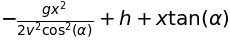

In [4]:
def f(x,v,alpha,h,g):
    
    return ((-g/2)*(x**2/(v**2*cos(alpha)**2))+x*tan(alpha)+h)
f(x,v,alpha,h,g)



* Q 1.2 - Plot the trajectory for the following set of parameters
    * $h = 1.70m$
    * $\alpha = 40^{\circ}$
    * $ v_{0} = 8 ms^{−1}$

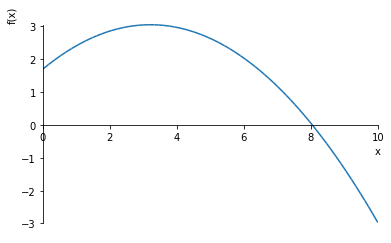

In [5]:
p1=f(x,8,np.deg2rad(40),1.7,9.81)
plot (p1,(x,0,10))

* Q 1.3 - On the same graph, plot several trajectories of projectile launched at different elevation angles but with the same speed v0 = 8ms−1 and the same initial altitude h = 1.70m.

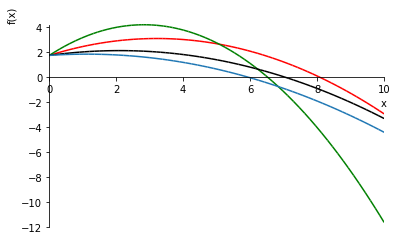

In [6]:
p1=f(x,8,np.deg2rad(40),1.7,9.81)
p2=f(x,8,np.deg2rad(60),1.7,9.81)
p3=f(x,8,np.deg2rad(20),1.7,9.81)
p4=f(x,8,np.deg2rad(10),1.7,9.81)
pp1=plot (p1,p2,p3,p4,(x,0,10),show=False)
pp1[0].line_color= 'r'
pp1[1].line_color = 'g'
pp1[2].line_color = 'k'
pp1.show()


## 2. Trajectory analysis


* Q 2.1 - Determine a function $f_h(\alpha, v_0 , h)$ that returns the greatest parabolic height a object reaches within its trajectory.



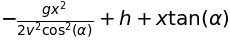

In [7]:
f(x,v,alpha,h,g)

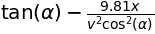

In [8]:
f_der=diff(f(x,v,alpha,h,g=9.81),x)
f_der

In [11]:
fun = solveset(f_der, x)
fun

* Q 2.2 - Determine a function $f_R(\alpha, v_0, h)$ that gives the range defined by the greatest distance aobject travels
along the x axis.

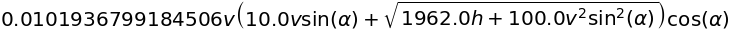

In [17]:
max_dist=solve(f(x,v,alpha,h,g=9.81),x)
val=max_dist[1]
val

* Q 2.3 - Illustrate with a graphic that an optimal value of $\alpha$ provides the highest range.



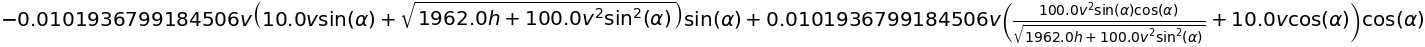

In [18]:
dervi=diff(val,alpha)
dervi

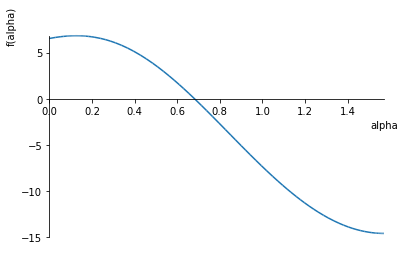

In [15]:
plot(dervi.subs({v:8, h:1.7}), (alpha, 0, pi/2))

* Q 2.4 - Try to find a symbolic solution of $\alpha$ optimum . Give an numeric solution for the set of parameters defined in section 1.


In [22]:
optval = solve(dervi.subs({v:8, h:1.7}), alpha)
optval[0]


* Q 2.5 - In the specific case where $h$ = 0, give an algebraic solution of $\alpha$ optimum .

In [28]:
a=solve(dervi.subs({h:0}), alpha)
a

## 3. Starting from scratch


Consider a particle of mass $m$, the Newton second law states:
$$F = ma$$
where $F$ and $a$ represent respectively the sum of forces and the acceleration of the projectile. 
Since we only consider the ideal case with $F = m\overrightarrow{g} = −mg\overrightarrow{z}$. 
Therefore, if we only consider the trajectory of in the plane $O\overrightarrow{x}\overrightarrow{z}$


we can write the coordinate of the mobile $M$ according to $\overrightarrow{OM}= 
\begin{pmatrix} 
  x \\
  z 
\end{pmatrix}$

eq(2):
$$\begin{pmatrix} 
  0 \\
  -g 
\end{pmatrix} = \frac{d^2 \overrightarrow{OM}}{dt^2} = 
\begin{pmatrix} 
  \frac{d^2 x}{dt^2} \\
  \frac{d^2 z}{dt^2}
\end{pmatrix}$$

* Q 3.1 - By integrating equation (2) and using correct initial constant, compute the two equations $x(t)$ and $z(t)$.


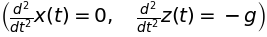

In [47]:
t=symbols('t')
#x=Function('x')(t)
x=Function('x')
#z=Function('z')(t)
z=Function('z')
#diff(x.diff())
#diff(z.diff())
eqx = Eq(x(t).diff(t, 2))
eqz = Eq(z(t).diff(t, 2), -g)
eqx,eqz

In [53]:
#integrate(integrate(eqz,t),t)
e = dsolve(eqz, z(t))
e

In [57]:
v0=symbols('v0')
C1, C2 = symbols('C1, C2')
e.subs({C1:h, C2:v0})

In [59]:
x0 = symbols('x0')
s = dsolve(eqx, x(t))
s.subs({C1:x0, C2:v0})